<a href="https://colab.research.google.com/github/chintanshrinath/beer_review/blob/main/Beer_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evolent Health Technical Solution**

#Import the libraries and Dataset

In [75]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
plt.style.use(['dark_background'])
sns.set(color_codes=True)

In [76]:
beer_data = pd.read_csv('/content/drive/My Drive/Beer Review/BeerDataScienceProject.csv', encoding='latin-1')

#Inspecting the dataframe

In [77]:
beer_data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [78]:
len(beer_data['beer_brewerId'].unique())

1803

In [79]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


#Checking missing values analysis, if it is there and drop observation

In [80]:
beer_data.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [81]:
beer_data.dropna(inplace =  True)

In [82]:
beer_data.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

# **Question : 1 Rank top 3 Breweries which produce the strongest beers?**



As per column headers, we will use beer_brewerId to get the strongest beers

Moreover, the strongest factor, we can decide beased on **Alcohol by volume (ABV)**, as there is only one factor, present in the dataset.

Therefore, we will use beer_ABV to dervied strongest beers


In [83]:
beer_data['beer_name'].value_counts()

Sierra Nevada Celebration Ale                 2998
Sierra Nevada Pale Ale                        2586
Founders Breakfast Stout                      2501
Sierra Nevada Bigfoot Barleywine Style Ale    2491
La Fin Du Monde                               2480
                                              ... 
Malaprop 8                                       1
Folklore (Coffee)                                1
Farfadet                                         1
Svaneke Choco Stout                              1
Croaking Lizard Brown Ale                        1
Name: beer_name, Length: 14028, dtype: int64

#Peforming outlier analysis using box plot

In [84]:
factors = pd.DataFrame(beer_data[['beer_ABV','beer_brewerId']])

In [85]:
factors.columns

Index(['beer_ABV', 'beer_brewerId'], dtype='object')

In [86]:
factors.head()

,beer_ABV,beer_brewerId
0,5.0,10325
1,6.2,10325
2,6.5,10325
3,5.0,10325
4,7.7,1075


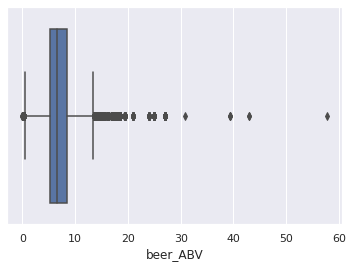

In [87]:
sns.boxplot(x=factors['beer_ABV'])

In [88]:
Q1 = factors.quantile(0.25)
Q3 = factors.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

beer_ABV            3.2
beer_brewerId    1183.0
dtype: float64


In [89]:
factors.shape

(508358, 2)

In [90]:
factors_out = factors[~((factors < (Q1 - 1.5 * IQR)) |(factors > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
factor_out= factors['beer_ABV'][~((factors['beer_ABV'] < (Q1 - 1.5 * IQR)) |(factors['beer_ABV'] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
factor_out= factors[~((factors < (Q1 - 1.5 * IQR)) |(factors > (Q3 + 1.5 * IQR))).any(axis=1)]

In [91]:
factors_out.shape

(412318, 2)

In [92]:
factors.columns

Index(['beer_ABV', 'beer_brewerId'], dtype='object')

In [93]:
q1_beer_data = factors.groupby('beer_brewerId')['beer_ABV'].mean()
strong_brewer = pd.DataFrame(q1_beer_data.reset_index())

In [94]:
strong_brewer = pd.DataFrame(q1_beer_data.reset_index())

In [95]:
strong_brewer

,beer_brewerId,beer_ABV
0,1,4.438717
1,3,5.537475
2,5,4.790072
3,10,4.973214
4,14,6.939831
...,...,...
1602,27870,6.000000
1603,27879,5.500000
1604,27917,8.000000
1605,27922,7.450000


In [96]:
sort_by_ABV_value = strong_brewer.sort_values(['beer_ABV','beer_brewerId'], ascending =[False,False])

As per analysis, we can say that the top 3 breweries are 6513, 736 and 24215  and beer_ABV values 19.22, 13.75 and 12.46 respectively

In [97]:
sort_by_ABV_value[:3]

,beer_brewerId,beer_ABV
699,6513,19.228824
165,736,13.750000
1466,24215,12.466667


# Answer 1 As per analysis, we can say that the top 3 breweries are 6513, 736 and 24215  and beer_ABV values 19.22, 13.75 and 12.46 respectively


# Question 2 Which year did beers enjoy the highest ratings?

#Answer 2 As there is no specific column that mentioned data and time to derived the answer

# Question 3 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

There are four features on basis of users have rate the beer. These are taste, aroma, apperance and palette

In [98]:
q3_sol = beer_data[['review_appearance','review_palette','review_taste','review_aroma']]

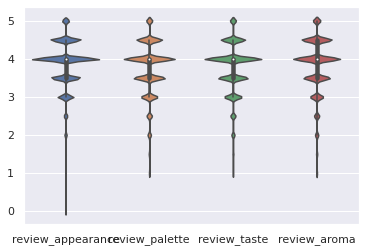

In [99]:
sns.violinplot(data = q3_sol);

In [100]:
q3_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508358 entries, 0 to 528796
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   review_appearance  508358 non-null  float64
 1   review_palette     508358 non-null  float64
 2   review_taste       508358 non-null  float64
 3   review_aroma       508358 non-null  float64
dtypes: float64(4)
memory usage: 19.4 MB


In [101]:
q3_sol.head()

,review_appearance,review_palette,review_taste,review_aroma
0,2.5,2.0,1.5,1.5
1,3.0,2.5,3.0,3.0
2,3.0,2.5,3.0,3.0
3,3.5,3.0,2.5,3.0
4,4.0,4.5,4.0,4.5


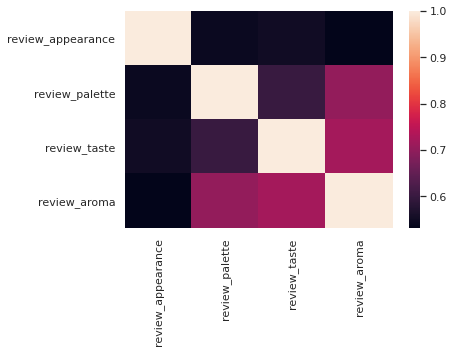

In [102]:
correaltion_analysis = q3_sol.corr()
sns.heatmap(correaltion_analysis)
plt.show()

In [103]:
display(q3_sol.corr())

,review_appearance,review_palette,review_taste,review_aroma
review_appearance,1.000000,0.544724,0.551979,0.531204
review_palette,0.544724,1.000000,0.600842,0.703428
review_taste,0.551979,0.600842,1.000000,0.722737
review_aroma,0.531204,0.703428,0.722737,1.000000


As there is review_aroma and review_taste, highly corelate to each other. Therefore, we should remove review_taste from the dataframe and consider as predictor to derive impportnat factor for beer

In [104]:
revised_q3_sol = q3_sol.drop(['review_taste'], axis = 1).columns

In [105]:
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(q3_sol[revised_q3_sol].values, q3_sol["review_taste"].values)
feature_importance = rnd_clf.feature_importances_

In [106]:
print(revised_q3_sol,feature_importance)

Index(['review_appearance', 'review_palette', 'review_aroma'], dtype='object') [0.07565518 0.01709533 0.90724949]


In [107]:
feature_name_list = []
feature_score_list = []
for feature_name, feature_score in zip(revised_q3_sol,feature_importance):
  feature_name_list.append(feature_name)
  feature_score_list.append(feature_score)


In [108]:
dict_data = {'feature_name':feature_name_list,'feature_score':feature_score_list}
plot_data = pd.DataFrame(dict_data, index = ['review_appearance','review_palette','review_aroma'])

In [109]:
plot_data['feature_score']

review_appearance    0.075655
review_palette       0.017095
review_aroma         0.907249
Name: feature_score, dtype: float64

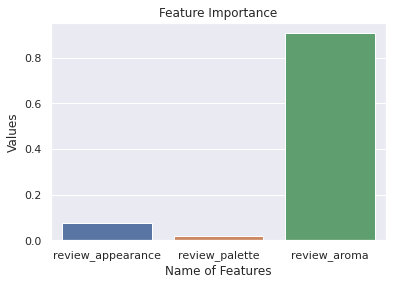

In [110]:
sns.barplot(x = plot_data.index, y = plot_data['feature_score'], data = plot_data);
plt.xlabel('Name of Features')
plt.ylabel('Values')
plt.title('Feature Importance');

# Answer 3 Based on  the analysis, we can say that review_aroma is important factor amongst the all features

# Question 4 If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

There are many factors on those factors, we can recommend best beer.
Such factors are beer_ABV, review_appearance, review_palette, review_overall, review_taste and review_aroma

In [111]:
beer_data.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

In [112]:
recommend_beer = beer_data.groupby('beer_name').agg({'review_overall':np.mean,
                                                     'beer_ABV':np.mean,
                                                     'review_appearance':np.mean,
                                                     'review_palette':np.mean,
                                                     'review_taste':np.mean,
                                                     'review_aroma':np.mean})
selection_of_beer = pd.DataFrame(recommend_beer.reset_index())

selection_of_top_3 = selection_of_beer.sort_values(['review_overall','beer_ABV','review_appearance','review_palette','review_taste'],
                                                   ascending = [False, False, False, False, False])


In [113]:
selection_of_top_3[:3]

,beer_name,review_overall,beer_ABV,review_appearance,review_palette,review_taste,review_aroma
444,AleSmith Speedway Stout - Oak Aged,5.0,12.0,5.0,4.5,5.0,4.5
9624,Pilot Series Imperial Sweet Stout - Palm Ridge...,5.0,12.0,4.0,4.5,4.5,4.5
1330,Bees Knees Barleywine,5.0,11.2,4.0,4.5,4.0,4.5


# Answer 4 The top 3 beer recommend

1.   AleSmith Speedway Stout - Oak Aged	
2.   Pilot Series Imperial Sweet Stout - Palm Ridge...	
3. Bees Knees Barleywine	





# Question 5.	Which Beer style seems to be the favorite based on reviews written by users? 

Here, we count total review for each beer style.

Then

In [114]:
s = beer_data.groupby(['beer_style'])['review_text'].count().sort_values(ascending= False)
#s = beer_data.groupby('beer_style')['review_text'].count().sort_values(ascending= True)

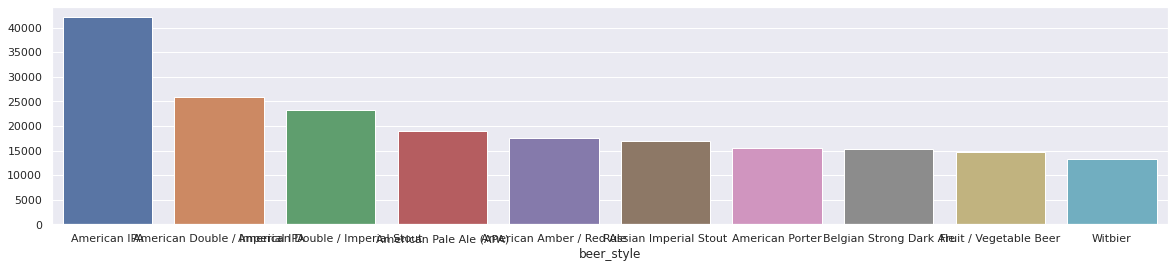

In [115]:
s = s[0:10]
plt.figure(figsize=(20,4)) 
sns.barplot(x = s.index, y= s.values)

In [116]:
list_of_beer_style = s.index[0:10]

In [156]:
list_beer_mean = []
for i in range(len(list_of_beer_style)):
  x = beer_data[beer_data['beer_style']==list_of_beer_style[i]]['review_overall'].mean()
  list_beer_mean.append([x, list_of_beer_style[i]])

In [157]:
list_beer_mean

[[3.9948683835408154, 'American IPA'],
 [3.953221364570808, 'American Double / Imperial IPA'],
 [4.10059503276992, 'American Double / Imperial Stout'],
 [3.884397800571006, 'American Pale Ale (APA)'],
 [3.879104647199182, 'American Amber / Red Ale'],
 [4.029481132075472, 'Russian Imperial Stout'],
 [3.888120475698035, 'American Porter'],
 [4.009565160616349, 'Belgian Strong Dark Ale'],
 [3.5638116070818238, 'Fruit / Vegetable Beer'],
 [3.7659759509944792, 'Witbier']]

In [158]:
list_beer_mean.sort(key = lambda i: i[0], reverse = True)

In [159]:
list_beer_mean

[[4.10059503276992, 'American Double / Imperial Stout'],
 [4.029481132075472, 'Russian Imperial Stout'],
 [4.009565160616349, 'Belgian Strong Dark Ale'],
 [3.9948683835408154, 'American IPA'],
 [3.953221364570808, 'American Double / Imperial IPA'],
 [3.888120475698035, 'American Porter'],
 [3.884397800571006, 'American Pale Ale (APA)'],
 [3.879104647199182, 'American Amber / Red Ale'],
 [3.7659759509944792, 'Witbier'],
 [3.5638116070818238, 'Fruit / Vegetable Beer']]

# Answer 5 : - As we have derived first count of review text for each beer_style and then we have used overall_rating for each beer_style as mean

So, we now derived there are three main beer_Style we can ask to user to taste



*   American Double / Imperial Stout
*   Russian Imperial Stout
* Belgian Strong Dark Ale



#Question 6 Which Beer style seems to be the favorite based on reviews written by users? 

First we will count review on basis of beer style.
Then sort the beer style by counts 

In next step, we will retrieved review_overall by each beer style to understand which beer style is favourite brand.

Then we will plot the data on historgram.

As per analysis, we can say that American IPA is one of the best beer style

In [352]:
s = beer_data.groupby('beer_style')['review_text'].count().sort_values(ascending= False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


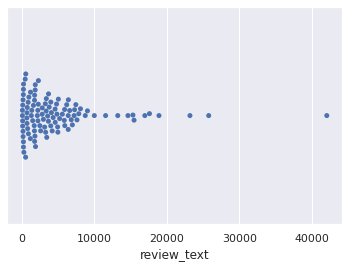

In [353]:
sns.swarmplot(s);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


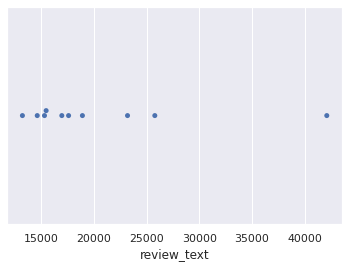

In [354]:
sns.swarmplot(s.head(10));

In [355]:
s.head(10)

beer_style
American IPA                        42092
American Double / Imperial IPA      25781
American Double / Imperial Stout    23192
American Pale Ale (APA)             18914
American Amber / Red Ale            17602
Russian Imperial Stout              16960
American Porter                     15472
Belgian Strong Dark Ale             15316
Fruit / Vegetable Beer              14629
Witbier                             13223
Name: review_text, dtype: int64

In [ ]:
s.index

In [ ]:
new = s.index

In [ ]:
new=new[:10]

In [ ]:
best_beer = []
for i in range(len(new)):

  #print(new[i])
  best_beer.append([new[i], beer_data[beer_data['beer_style']==new[i]]['review_overall'].sum()])

In [ ]:
best_beer

In [ ]:
convert_best_beer = pd.DataFrame(best_beer,columns = ['Beer_style','count'])

In [335]:
convert_best_beer

,Beer_style,count
0,American IPA,168152.0
1,American Double / Imperial IPA,101918.0
2,American Double / Imperial Stout,95101.0
3,American Pale Ale (APA),73469.5
4,American Amber / Red Ale,68280.0
5,Russian Imperial Stout,68340.0
6,American Porter,60157.0
7,Belgian Strong Dark Ale,61410.5
8,Fruit / Vegetable Beer,52135.0
9,Witbier,49797.5


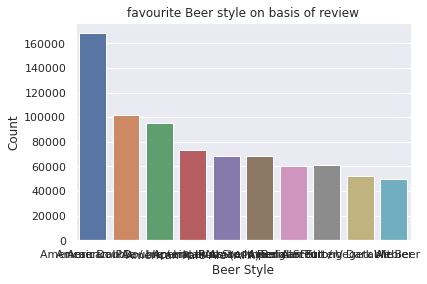

In [336]:
sns.barplot(x = convert_best_beer['Beer_style'], y = convert_best_beer['count'], data = convert_best_beer);
plt.xlabel('Beer Style')
plt.ylabel('Count')
plt.title('favourite Beer style on basis of review' );

#Answer 6 As per over all review score against wrtten review,we can say that below are best beer style



*   American Double / Imperial IPA	
*   American Double / Imperial Stout	
* American Pale Ale (APA)	

